# **Data Wrangling Project 2024**
---

In fulfillment of the course *Data Wrangling XB_0014* at the *Vrije Universiteit Amsterdam*.<br>
This project was conducted by **Alvaro Pratama Maharto, Michael Evan Sutanto, Mahmoud Ashtar, and Miguel Sadorra.**


## **TOPIC**: Marketing Strategy Effectivity
This research will be taking a look at the effects of different types of marketing campaigns and their effectivity in terms of clickthrough rate, customer engagement, and customer acquisition.
We will be having a look at the dataset with the following question in mind:
### RESEARCH QUESTION
*How do different marketing strategies, particularly those used in bulk campaigns, impact the overall effectiveness of marketing initiatives, considering metrics such as clickthrough rates, customer engagement, and customer acquisition?*

## Data Acquisition

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [48]:
campaigns_df = pd.read_csv("campaigns.csv")
messages_df = pd.read_csv("messages-demo.csv")

messages_df.head()

C:\Users\Alvaro\AppData\Local\Temp\ipykernel_3828\1183315834.py:2: DtypeWarning: Columns (7,8,16,17,19,21,23,25,27,29) have mixed types. Specify dtype option on import or set low_memory=False.
  messages_df = pd.read_csv("messages-demo.csv")


,id,message_id,campaign_id,message_type,client_id,channel,category,platform,email_provider,stream,...,is_soft_bounced,soft_bounced_at,is_complained,complained_at,is_blocked,blocked_at,is_purchased,purchased_at,created_at,updated_at
0,3527358,3f6aaad3-bab7-4886-b083-fe8c1f210066,31,transactional,1515915625489833514,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,t,2021-05-06 16:40:38,2023-04-27 08:55:05.883908,2023-04-27 08:57:33.080129
1,3527619,0e670ecc-4549-44f6-86ed-469682d34837,32,transactional,1515915625489220445,email,NaN,NaN,yandex.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.265821,2023-04-27 08:56:18.60223
2,3527980,276b25cf-1bda-4faf-b3a4-98e4161f9357,32,transactional,1515915625489854185,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:06.777039,2023-04-27 08:56:19.112546
3,3528369,4545aff2-09b3-45e3-9abd-c680357e5429,32,transactional,1515915625489101550,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.325906,2023-04-27 08:56:19.590637
4,3528648,5850858d-2dcf-4f31-a0d3-5db5649b17c4,32,transactional,1515915625490455948,email,NaN,NaN,mail.ru,desktop,...,f,NaN,f,NaN,f,NaN,f,NaN,2023-04-27 08:55:07.727792,2023-04-27 08:56:19.926474


In [49]:
print(len(messages_df))
print(len(campaigns_df))

10000000
1907


## Data Cleaning


### Sampling
Since the data is about 10 million rows big, the group decided to use only a sample of 40% of the data to cut down on computing time.

In [50]:
# messages_df = messages_df[messages_df["message_type"] == "bulk"] # since bulk campaigns are over 93% of the campaigns we are only working with bulk messages and bulk campaings
# campaigns_df = campaigns_df[campaigns_df["campaign_type"] == "bulk"]

messages_sample = messages_df.sample(frac= 0.40, random_state= 42, replace= False)

In [51]:
messages_sample.head()
print(len(messages_sample))

4000000


### Data Dropping
We will eliminate all of the unneccessary columns from the dataframes we created above and consolidate them into one `merged_df`

In [52]:
print("Messages Database:\n",list(messages_df.columns),"\n")
print("Campaigns Database:\n",list(campaigns_df.columns))

Messages Database:
 ['id', 'message_id', 'campaign_id', 'message_type', 'client_id', 'channel', 'category', 'platform', 'email_provider', 'stream', 'date', 'sent_at', 'is_opened', 'opened_first_time_at', 'opened_last_time_at', 'is_clicked', 'clicked_first_time_at', 'clicked_last_time_at', 'is_unsubscribed', 'unsubscribed_at', 'is_hard_bounced', 'hard_bounced_at', 'is_soft_bounced', 'soft_bounced_at', 'is_complained', 'complained_at', 'is_blocked', 'blocked_at', 'is_purchased', 'purchased_at', 'created_at', 'updated_at'] 

Campaigns Database:
 ['id', 'campaign_type', 'channel', 'topic', 'started_at', 'finished_at', 'total_count', 'ab_test', 'warmup_mode', 'hour_limit', 'subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 'subject_with_bonuses', 'subject_with_discount', 'subject_with_saleout', 'is_test', 'position']


In [53]:
# our sample has many columns >>> some are disposable and some are missing the majority of the values => these will be dropped
messages_sample = messages_sample.drop(["id", "stream", "hard_bounced_at", "soft_bounced_at","is_soft_bounced", "is_hard_bounced", 
                                        "message_type", "message_id", "created_at", "updated_at", "is_complained", "complained_at"],
                                           axis= 1)

campaigns_df = campaigns_df.drop(["warmup_mode", "started_at", "finished_at", "total_count", "channel"], axis=1)
#Dropped channel because we focus on message channel

In [54]:
display(messages_sample[:10])

,campaign_id,client_id,channel,category,platform,email_provider,date,sent_at,is_opened,opened_first_time_at,opened_last_time_at,is_clicked,clicked_first_time_at,clicked_last_time_at,is_unsubscribed,unsubscribed_at,is_blocked,blocked_at,is_purchased,purchased_at
919213,64,1515915625627233152,mobile_push,NaN,NaN,NaN,2021-04-30,2021-04-30 08:47:49,f,NaN,NaN,f,NaN,NaN,t,2021-04-30 08:47:49,f,NaN,f,NaN
9467153,19017,1515915625490484296,email,NaN,NaN,inbox.ru,2021-06-09,2021-06-09 10:20:24,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
6585777,152,1515915625468236701,email,NaN,NaN,mail.ru,2021-05-24,2021-05-24 08:00:41,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
3878022,111,1515915625629380670,mobile_push,NaN,NaN,NaN,2021-05-12,2021-05-12 08:11:23,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
5537116,150,1515915625501027566,email,NaN,NaN,mail.ru,2021-05-21,2021-05-21 08:06:56,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
5893459,150,1515915625487280848,email,NaN,NaN,mail.ru,2021-05-21,2021-05-21 07:02:26,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
8653685,298,1515915625490791354,mobile_push,NaN,NaN,NaN,2021-06-03,2021-06-03 13:00:18,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
6880281,18012,1515915625500435910,email,NaN,NaN,gmail.com,2021-05-25,2021-05-25 18:25:50,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
9478495,18212,1515915625559278997,email,NaN,NaN,inbox.ru,2021-06-09,2021-06-09 07:35:14,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN
2930982,18016,1515915625567624693,email,NaN,NaN,gmail.com,2021-05-12,2021-05-12 06:15:55,f,NaN,NaN,f,NaN,NaN,f,NaN,f,NaN,f,NaN


In [55]:
display(campaigns_df[:10])

,id,campaign_type,topic,ab_test,hour_limit,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout,is_test,position
0,63,bulk,sale out,NaN,NaN,146.0,False,False,True,False,False,False,NaN,NaN
1,64,bulk,sale out,NaN,NaN,97.0,False,False,True,False,False,False,NaN,NaN
2,78,bulk,sale out,NaN,NaN,146.0,False,False,True,False,False,False,NaN,NaN
3,79,bulk,sale out,NaN,NaN,97.0,False,False,True,False,False,False,NaN,NaN
4,89,bulk,NaN,NaN,NaN,109.0,False,True,True,False,False,False,NaN,NaN
5,110,bulk,sale out,NaN,NaN,146.0,False,False,True,False,False,False,NaN,NaN
6,111,bulk,sale out,NaN,NaN,97.0,False,False,True,False,False,False,NaN,NaN
7,129,bulk,sale out,NaN,NaN,133.0,False,False,True,False,False,False,NaN,NaN
8,136,bulk,sale out,NaN,NaN,133.0,False,False,True,False,False,False,NaN,NaN
9,138,bulk,sale out,NaN,NaN,146.0,False,False,True,False,False,False,NaN,NaN


### Handling Missing Value

In [56]:
messages_sample.isna().sum()

campaign_id                    0
client_id                      0
channel                        0
category                 4000000
platform                 3705066
email_provider           1691445
date                           0
sent_at                        0
is_opened                      0
opened_first_time_at     3354142
opened_last_time_at      3354142
is_clicked                     0
clicked_first_time_at    3905973
clicked_last_time_at     3905973
is_unsubscribed                0
unsubscribed_at          3878872
is_blocked                     0
blocked_at               3999914
is_purchased                   0
purchased_at             3995054
dtype: int64

In [57]:
messages_sample = messages_sample.drop(["category", "platform", "email_provider", "opened_first_time_at", "opened_last_time_at", "clicked_first_time_at", 
                                        "clicked_last_time_at", "blocked_at", "unsubscribed_at", "purchased_at"], axis=1)
messages_sample.isna().sum()

campaign_id        0
client_id          0
channel            0
date               0
sent_at            0
is_opened          0
is_clicked         0
is_unsubscribed    0
is_blocked         0
is_purchased       0
dtype: int64

In [58]:
campaigns_df.isna().sum()

id                                 0
campaign_type                      0
topic                             30
ab_test                         1895
hour_limit                      1876
subject_length                    27
subject_with_personalization      27
subject_with_deadline             27
subject_with_emoji                27
subject_with_bonuses              27
subject_with_discount             27
subject_with_saleout              27
is_test                         1880
position                        1883
dtype: int64

In [60]:
campaigns_df.dropna(subset=['subject_length', 'subject_with_personalization', 'subject_with_deadline', 'subject_with_emoji', 
                            'subject_with_bonuses','subject_with_discount', 'subject_with_saleout'], 
                            how='all', 
                            inplace=True)
campaigns_df.dropna(subset=['topic'], how='all', inplace=True)
campaigns_df.isna().sum()

id                                 0
campaign_type                      0
topic                              0
ab_test                         1847
hour_limit                      1824
subject_length                     0
subject_with_personalization       0
subject_with_deadline              0
subject_with_emoji                 0
subject_with_bonuses               0
subject_with_discount              0
subject_with_saleout               0
is_test                         1853
position                        1853
dtype: int64

In [61]:
campaigns_df = campaigns_df.drop(["ab_test", "hour_limit", "is_test", "position", "campaign_type"], axis=1)
campaigns_df.isna().sum()

id                              0
topic                           0
subject_length                  0
subject_with_personalization    0
subject_with_deadline           0
subject_with_emoji              0
subject_with_bonuses            0
subject_with_discount           0
subject_with_saleout            0
dtype: int64

### Transformation via Mapping
Converting string and bool values to binary. Since the database contains a lot of string values to represent True or False, we will convert these values to binary to have an easier time understanding the database and using it to analyze the data.

In [62]:
display(messages_sample[:10])

,campaign_id,client_id,channel,date,sent_at,is_opened,is_clicked,is_unsubscribed,is_blocked,is_purchased
919213,64,1515915625627233152,mobile_push,2021-04-30,2021-04-30 08:47:49,f,f,t,f,f
9467153,19017,1515915625490484296,email,2021-06-09,2021-06-09 10:20:24,f,f,f,f,f
6585777,152,1515915625468236701,email,2021-05-24,2021-05-24 08:00:41,f,f,f,f,f
3878022,111,1515915625629380670,mobile_push,2021-05-12,2021-05-12 08:11:23,f,f,f,f,f
5537116,150,1515915625501027566,email,2021-05-21,2021-05-21 08:06:56,f,f,f,f,f
5893459,150,1515915625487280848,email,2021-05-21,2021-05-21 07:02:26,f,f,f,f,f
8653685,298,1515915625490791354,mobile_push,2021-06-03,2021-06-03 13:00:18,f,f,f,f,f
6880281,18012,1515915625500435910,email,2021-05-25,2021-05-25 18:25:50,f,f,f,f,f
9478495,18212,1515915625559278997,email,2021-06-09,2021-06-09 07:35:14,f,f,f,f,f
2930982,18016,1515915625567624693,email,2021-05-12,2021-05-12 06:15:55,f,f,f,f,f


In [63]:
messages_sample.loc[:, 'is_opened':] = messages_sample.loc[:,'is_opened':].map(lambda x: 1 if x=='t' else 0)
display(messages_sample[:10])

,campaign_id,client_id,channel,date,sent_at,is_opened,is_clicked,is_unsubscribed,is_blocked,is_purchased
919213,64,1515915625627233152,mobile_push,2021-04-30,2021-04-30 08:47:49,0,0,1,0,0
9467153,19017,1515915625490484296,email,2021-06-09,2021-06-09 10:20:24,0,0,0,0,0
6585777,152,1515915625468236701,email,2021-05-24,2021-05-24 08:00:41,0,0,0,0,0
3878022,111,1515915625629380670,mobile_push,2021-05-12,2021-05-12 08:11:23,0,0,0,0,0
5537116,150,1515915625501027566,email,2021-05-21,2021-05-21 08:06:56,0,0,0,0,0
5893459,150,1515915625487280848,email,2021-05-21,2021-05-21 07:02:26,0,0,0,0,0
8653685,298,1515915625490791354,mobile_push,2021-06-03,2021-06-03 13:00:18,0,0,0,0,0
6880281,18012,1515915625500435910,email,2021-05-25,2021-05-25 18:25:50,0,0,0,0,0
9478495,18212,1515915625559278997,email,2021-06-09,2021-06-09 07:35:14,0,0,0,0,0
2930982,18016,1515915625567624693,email,2021-05-12,2021-05-12 06:15:55,0,0,0,0,0


In [64]:
display(campaigns_df[:10])

,id,topic,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,63,sale out,146.0,False,False,True,False,False,False
1,64,sale out,97.0,False,False,True,False,False,False
2,78,sale out,146.0,False,False,True,False,False,False
3,79,sale out,97.0,False,False,True,False,False,False
5,110,sale out,146.0,False,False,True,False,False,False
6,111,sale out,97.0,False,False,True,False,False,False
7,129,sale out,133.0,False,False,True,False,False,False
8,136,sale out,133.0,False,False,True,False,False,False
9,138,sale out,146.0,False,False,True,False,False,False
10,139,sale out,97.0,False,False,True,False,False,False


In [65]:
campaigns_df.loc[:, 'subject_with_personalization':] = campaigns_df.loc[:,'subject_with_personalization':].map(lambda x: 1 if x==True else 0)
display(campaigns_df[:10])


,id,topic,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,63,sale out,146.0,0,0,1,0,0,0
1,64,sale out,97.0,0,0,1,0,0,0
2,78,sale out,146.0,0,0,1,0,0,0
3,79,sale out,97.0,0,0,1,0,0,0
5,110,sale out,146.0,0,0,1,0,0,0
6,111,sale out,97.0,0,0,1,0,0,0
7,129,sale out,133.0,0,0,1,0,0,0
8,136,sale out,133.0,0,0,1,0,0,0
9,138,sale out,146.0,0,0,1,0,0,0
10,139,sale out,97.0,0,0,1,0,0,0


## Data Merging

### Database-style dataframe joins
Perform an inner join based on the `id` of `campaigns.csv` and the `campaign_id` of `messages.csv`

In [66]:
merged_df = pd.merge(messages_sample, campaigns_df, left_on = "campaign_id", right_on= "id" ,how= "inner")
print(merged_df.isna().sum())

campaign_id                     0
client_id                       0
channel                         0
date                            0
sent_at                         0
is_opened                       0
is_clicked                      0
is_unsubscribed                 0
is_blocked                      0
is_purchased                    0
id                              0
topic                           0
subject_length                  0
subject_with_personalization    0
subject_with_deadline           0
subject_with_emoji              0
subject_with_bonuses            0
subject_with_discount           0
subject_with_saleout            0
dtype: int64


In [67]:
merged_df = merged_df.drop(["id"], axis=1)

In [68]:
display(merged_df[:10])

,campaign_id,client_id,channel,date,sent_at,is_opened,is_clicked,is_unsubscribed,is_blocked,is_purchased,topic,subject_length,subject_with_personalization,subject_with_deadline,subject_with_emoji,subject_with_bonuses,subject_with_discount,subject_with_saleout
0,64,1515915625627233152,mobile_push,2021-04-30,2021-04-30 08:47:49,0,0,1,0,0,sale out,97.0,0,0,1,0,0,0
1,64,1515915625627233152,mobile_push,2021-04-30,2021-04-30 08:47:49,0,0,1,0,0,order ready for pickup,139.0,0,0,0,0,0,0
2,64,1515915625490165431,mobile_push,2021-04-30,2021-04-30 07:37:51,0,0,0,0,0,sale out,97.0,0,0,1,0,0,0
3,64,1515915625490165431,mobile_push,2021-04-30,2021-04-30 07:37:51,0,0,0,0,0,order ready for pickup,139.0,0,0,0,0,0,0
4,64,1515915625591164203,mobile_push,2021-04-30,2021-04-30 08:18:05,0,0,0,0,0,sale out,97.0,0,0,1,0,0,0
5,64,1515915625591164203,mobile_push,2021-04-30,2021-04-30 08:18:05,0,0,0,0,0,order ready for pickup,139.0,0,0,0,0,0,0
6,64,1515915625549664968,mobile_push,2021-04-30,2021-04-30 07:40:46,0,0,0,0,0,sale out,97.0,0,0,1,0,0,0
7,64,1515915625549664968,mobile_push,2021-04-30,2021-04-30 07:40:46,0,0,0,0,0,order ready for pickup,139.0,0,0,0,0,0,0
8,64,1515915625596253090,mobile_push,2021-04-30,2021-04-30 08:20:41,0,0,0,0,0,sale out,97.0,0,0,1,0,0,0
9,64,1515915625596253090,mobile_push,2021-04-30,2021-04-30 08:20:41,0,0,0,0,0,order ready for pickup,139.0,0,0,0,0,0,0


## Analyzing the Data
The group will now be analyzing the data in this section. We will be looking at important characteristics of the marketing campaign subjects and its effectiveness with regard to clickthrough rate which campaigns result in client purchase.

In [69]:
# can remove since every row has an emoji
emoji = merged_df.groupby("subject_with_emoji")['is_purchased'].value_counts()

# can remove since none have bonuses lol
bonuses = merged_df.groupby("subject_with_bonuses")['is_purchased'].value_counts()
display(bonuses)
display(emoji)

subject_with_bonuses  is_purchased
0                     0               3542615
                      1                  2983
1                     0                 67653
                      1                    62
Name: count, dtype: int64

subject_with_emoji  is_purchased
0                   0                747604
                    1                  1999
1                   0               2862664
                    1                  1046
Name: count, dtype: int64

### Marketing effect on Purchases
We will look at the effectiveness of advertising **<u>subject customization</u>** on sales.

In [70]:
personalization = merged_df.groupby('subject_with_personalization')['is_purchased'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_purchased'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_purchased'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_purchased'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_purchased', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [71]:
display(final_result)

personalization       deadline       discount        saleout  \
                           0     1        0     1        0     1        0   
is_purchased                                                                
0                    3607721  3042  3518912  2787  3597840  3042  3517439   
1                       2547     3    91356   258    12428     3    92829   

                    
                 1  
is_purchased        
0             3034  
1               11

After getting the correct dataframe with the effects of subject customization, we will then look at the improvement on sales per customization type (e.g. message personalization, messages with deadlines, message with discounts, message with saleouts).

In [72]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_purchased              0         1
                                     
personalization 0  0.999295  0.000705
                1  0.999015  0.000985
deadline        0  0.974696  0.025304
                1  0.915271  0.084729
discount        0  0.996558  0.003442
                1  0.999015  0.000985
saleout         0  0.974288  0.025712
                1  0.996388  0.003612

<strong>Marketing results on Sales</strong>

,Difference,Percent Increase
personalization,0.000280,39.651130
deadline,0.059425,234.838028
discount,-0.002457,-71.379834
saleout,-0.022100,-85.950491


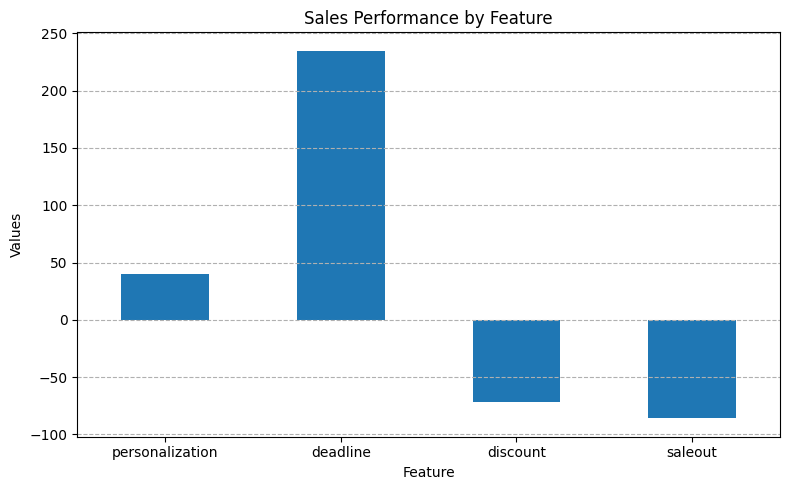

In [73]:
def getdiff(diff_df, feature):
    return diff_df[1][(feature, 1)] - diff_df[1][(feature, 0)]
def get_percent(diff_df, feature):
    diff_1 = diff_df[1][(feature, 1)] - diff_df[1][(feature, 0)]
    return (diff_1 / diff_df[1][(feature, 0)]) * 100
list_index = ['personalization', 'deadline', 'discount', 'saleout']

sales_performance = pd.DataFrame({'Difference': [getdiff(diff, i) for i in list_index], 'Percent Increase': [get_percent(diff, i) for i in list_index]}, index = list_index)

display(sales_performance)

sales_performance['Percent Increase'].plot(kind='bar', figsize=(8, 5))
plt.title('Sales Performance by Feature')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Marketing Performance on Clickthrough Rate


In [74]:
personalization = merged_df.groupby('subject_with_personalization')['is_clicked'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_clicked'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_clicked'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_clicked'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_clicked', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [75]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_clicked                0         1
                                     
personalization 0  0.999323  0.000677
                1  0.997375  0.002625
deadline        0  0.975257  0.024743
                1  0.933186  0.066814
discount        0  0.996581  0.003419
                1  0.995111  0.004889
saleout         0  0.974157  0.025843
                1  0.984400  0.015600

In [76]:
def getdiff(diff_df, feature):
    return diff_df[1][(feature, 1)] - diff_df[1][(feature, 0)]
def get_percent(diff_df, feature):
    diff_1 = diff_df[1][(feature, 1)] - diff_df[1][(feature, 0)]
    return (diff_1 / diff_df[1][(feature, 0)]) * 100
list_index = ['personalization', 'deadline', 'discount', 'saleout']

sales_performance = pd.DataFrame({'Difference': [getdiff(diff, i) for i in list_index], 'Percent Increase': [get_percent(diff, i) for i in list_index]}, index = list_index)

display(sales_performance)

,Difference,Percent Increase
personalization,0.001948,287.574091
deadline,0.042071,170.036017
discount,0.001470,43.005513
saleout,-0.010243,-39.635087


### Marketing Performance on Customer Engagement

In [77]:
personalization = merged_df.groupby('subject_with_personalization')['is_unsubscribed'].value_counts()
deadline = merged_df.groupby("subject_with_deadline")['is_unsubscribed'].value_counts()
discounts = merged_df.groupby("subject_with_discount")['is_unsubscribed'].value_counts()
saleout = merged_df.groupby('subject_with_saleout')['is_unsubscribed'].value_counts()

result = pd.concat([personalization, deadline, discounts, saleout], axis=1, keys=['personalization', 'deadline', 'discount', 'saleout'])
index = pd.MultiIndex.from_tuples([(0, 0), (0, 1), (1, 0), (1, 1)], names=['is_unsubscribed', ''])
final_result = pd.DataFrame(result, index=index)
final_result = final_result.unstack().fillna(0).astype(int)

In [78]:
final_result = final_result.transpose()
diff = final_result.div(final_result.sum(1),axis=0)
display(final_result.div(final_result.sum(1),axis=0))

is_unsubscribed           0         1
                                     
personalization 0  0.999258  0.000742
                1  0.999973  0.000027
deadline        0  0.973291  0.026709
                1  0.999719  0.000281
discount        0  0.996487  0.003513
                1  0.997905  0.002095
saleout         0  0.973006  0.026994
                1  0.998369  0.001631

,Difference,Percent Increase
personalization,0.0,0.071591
deadline,0.0,2.715328
discount,0.0,0.142253
saleout,0.0,2.606621


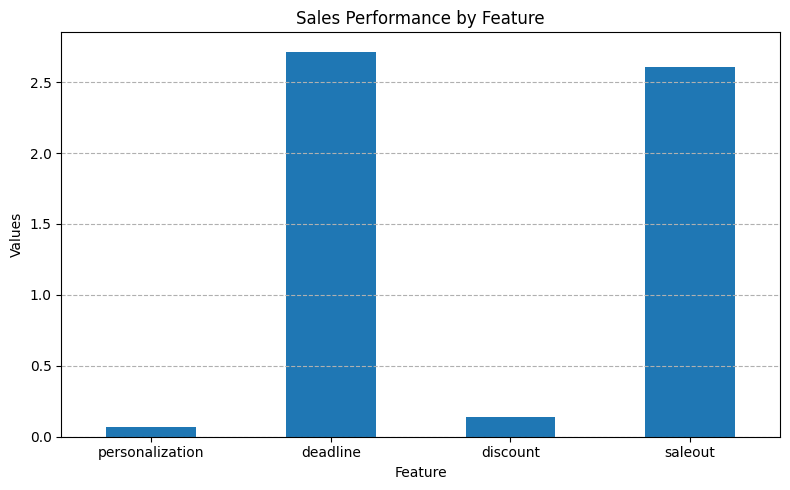

In [79]:
def getdiff(diff_df, feature):
    return diff_df[0][(feature, 1)] - diff_df[0][(feature, 1)]
def get_percent(diff_df, feature):
    diff_1 = diff_df[0][(feature, 1)] - diff_df[0][(feature, 0)]
    return (diff_1 / diff_df[0][(feature, 0)]) * 100
list_index = ['personalization', 'deadline', 'discount', 'saleout']

sales_performance = pd.DataFrame({'Difference': [getdiff(diff, i) for i in list_index], 'Percent Increase': [get_percent(diff, i) for i in list_index]}, index = list_index)

display(sales_performance)

sales_performance['Percent Increase'].plot(kind='bar', figsize=(8, 5))
plt.title('Sales Performance by Feature')
plt.xlabel('Feature')
plt.ylabel('Values')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

### Marketing Performance based on Channel Type


In [80]:
channel_type = merged_df.groupby('channel')
channel_purchases = channel_type['is_purchased'].value_counts()
print(channel_purchases)
channel_clicks = channel_type['is_clicked'].value_counts()
print(channel_clicks)


result_table = pd.concat([channel_purchases, channel_clicks], axis=1, keys=['purchased', 'clicked'])
result_table = result_table.unstack(level=1).fillna(0)
display(result_table)

channel      is_purchased
email        0               1516025
             1                  3045
mobile_push  0               2094243
Name: count, dtype: int64
channel      is_clicked
email        0             1468785
             1               50285
mobile_push  0             2091964
             1                2279
Name: count, dtype: int64


purchased          clicked       
                     0       1        0      1
channel                                       
email        1516025.0  3045.0  1468785  50285
mobile_push  2094243.0     0.0  2091964   2279

In [81]:
print(merged_df['channel'].unique())

['mobile_push' 'email']


### The Impact of Subject Length on Email Open Rates

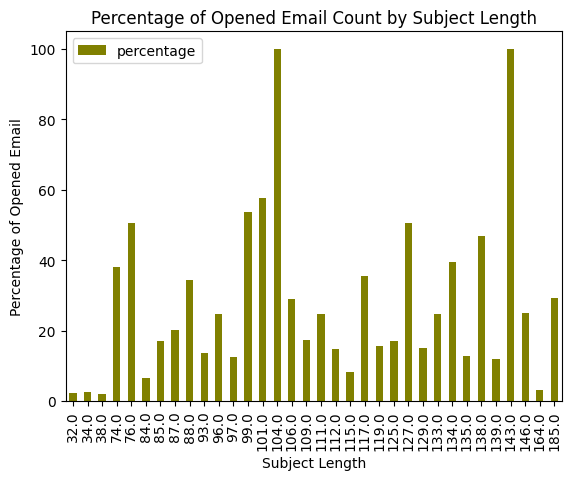

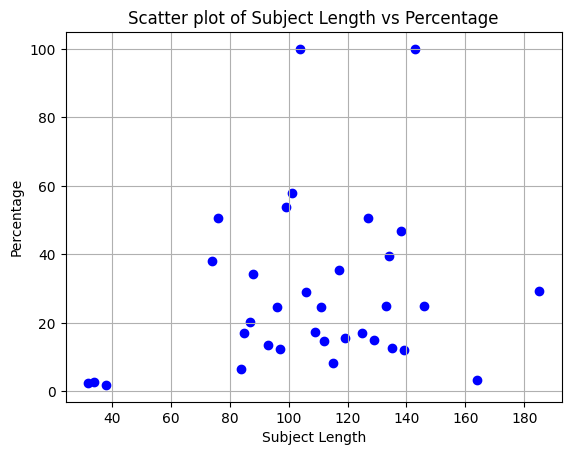

In [92]:
grouped_data = merged_df.groupby(['subject_length', 'is_opened']).size().reset_index(name='count')
opened_data = grouped_data[grouped_data['is_opened'] == 1]
ignored_data = grouped_data[grouped_data['is_opened'] == 0]

# print(len(merged_df[(merged_df.subject_length == 104.0) & (merged_df.is_opened == 1)]))

pivot_data = grouped_data.pivot_table(index='subject_length', columns='is_opened', values='count', fill_value=0)
pivot_data['percentage'] = (pivot_data[1] / (pivot_data[1] + pivot_data[0])) * 100
pivot_data.reset_index(inplace=True)
# print(pivot_data[['subject_length', 'percentage']])

pivot_data.plot(kind='bar', x='subject_length', y='percentage', color='olive')
plt.xlabel('Subject Length')
plt.ylabel('Percentage of Opened Email')
plt.title('Percentage of Opened Email Count by Subject Length')
plt.show()

#This scatterplot shows no correlation of subject length on email open rates
plt.scatter(pivot_data['subject_length'], pivot_data['percentage'], color='blue', label='Data Points')
plt.xlabel('Subject Length')
plt.ylabel('Percentage')
plt.title('Scatter plot of Subject Length vs Percentage')
plt.grid(True)
plt.show()

### Checking if holidays correspond to client purchases

In [83]:
holidays_df = pd.read_csv('holidays.csv')
first_purchase_df = pd.read_csv('client_first_purchase_date.csv')

from datetime import datetime
import pytz

Creating a dataframe looking at the marketing generated sales that occured during holidays:

Creating a dataframe looking at the store sales that occured during holidays:

In [84]:
result_df = pd.merge(holidays_df, first_purchase_df, left_on='date', right_on='first_purchase_date', how='inner')
holiday_store_sales_df = result_df[['holiday', 'date']].value_counts().reset_index(name='count')
display(holiday_store_sales_df)

,holiday,date,count
0,Unity Day,2022-11-04,6416
1,Independence Day,2023-06-12,4908
2,Spring and Labor Day,2023-05-01,3831
3,Victory day,2023-05-09,3286
4,Back to School,2023-09-01,3209
5,Black Friday,2023-11-24,3004
6,International Women's Day,2022-03-08,2851
7,Fool's day,2022-04-01,2643
8,Unity Day,2023-11-04,2512
9,Cyber Monday Sale,2022-01-31,2508


In [85]:
print(campaigns_df["topic"].unique())
print(merged_df["topic"].unique())

clicked_per_topic = merged_df.groupby("topic")["is_clicked"].value_counts()
opened_per_topic = merged_df.groupby("topic")["is_opened"].value_counts()
purchased_per_topic = merged_df.groupby("topic")["is_purchased"].value_counts()
display(clicked_per_topic)
display(opened_per_topic)
display(purchased_per_topic)



['sale out' 'event' 'offer after purchase' 'happy birthday' 'leave review'
 'welcome campaign' 'order shipped' 'order reminder' 'welcome letter'
 'order ready for pickup' 'order created' 'bonuses expired'
 'order cancelled' 'order pickup still pending' 'profile updated'
 'wish list status']
['sale out' 'order ready for pickup' 'bonuses expired' 'order cancelled'
 'order pickup still pending' 'order reminder' 'order created'
 'profile updated' 'order shipped' 'event' 'wish list status']


topic                       is_clicked
bonuses expired             0               65812
                            1                1903
event                       0                6301
                            1                 298
order cancelled             0               54495
                            1                2324
order created               0               91820
                            1                5251
order pickup still pending  0                1758
                            1                  85
order ready for pickup      0              480187
                            1                5749
order reminder              0               65448
                            1                 762
order shipped               0               14370
                            1                1157
profile updated             0               25493
                            1                 704
sale out                    0             2755063
           

topic                       is_opened
bonuses expired             0              59145
                            1               8570
event                       0               4827
                            1               1772
order cancelled             0              39653
                            1              17166
order created               0              62613
                            1              34458
order pickup still pending  0               1043
                            1                800
order ready for pickup      0             408639
                            1              77297
order reminder              0              54994
                            1              11216
order shipped               1               7857
                            0               7670
profile updated             0              15856
                            1              10341
sale out                    0            2399014
                            1  

topic                       is_purchased
bonuses expired             0                 67653
                            1                    62
event                       0                  6593
                            1                     6
order cancelled             0                 56205
                            1                   614
order created               0                 96454
                            1                   617
order pickup still pending  0                  1829
                            1                    14
order ready for pickup      0                485333
                            1                   603
order reminder              0                 66197
                            1                    13
order shipped               0                 15443
                            1                    84
profile updated             0                 26143
                            1                    54
sale out               

In [86]:

# for i in clicked_per_topic.index:
#     print(clicked_per_topic[i[0]])
# clicked_percentage = clicked_per_topic["event"][1] / (clicked_per_topic["event"][1] + clicked_per_topic["event"][0]) * 100
# print(clicked_percentage)

print(type(clicked_per_topic))

<class 'pandas.core.series.Series'>


In [87]:

def calc_perecentage(rest, part):
    return (part / (rest + part)) * 100

def calc_percentages(col_name):
    topics_clicks = topcis_engagement.groupby("topic")[col_name].value_counts()
    # calculating clicks percentages of our chosen topics
    percentages = []
    for i in range(0, len(topics_clicks), 2):
        if i == len(topics_clicks) - 1:  # least one has 0 clicks so clicks percentage is 0%
            percentages.append(0)
            break
        percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))

    return percentages

# Choosing 5 topics with most engagement and 5 topics with least engagement
topics = merged_df["topic"].value_counts()
topics = pd.concat([topics[:5], topics[-5:]])

# filter only the topics in our engagement list
topcis_engagement = merged_df.loc[merged_df["topic"].isin(topics.index)][["topic", "is_clicked", "is_opened", "is_purchased"]]

topics_clicks = topcis_engagement.groupby("topic")["is_clicked"].value_counts()

# calculating clicks percentages of our chosen topics
clicks_percentages = calc_percentages("is_clicked")
opened_percentages = calc_percentages("is_opened")
purchased_percentages = calc_percentages("is_purchased")


print("topics with most engagement:")
for i in topics.index[:5]:
    print(i, end= ", ")
print("\n\ntopics with least engagement:")
for i in topics.index[-5:]:
    print(i, end=", ")

print("\n\n", topics)


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_3828\841604187.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))
C:\Users\Alvaro\AppData\Local\Temp\ipykernel_3828\841604187.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))


topics with most engagement:
sale out, order ready for pickup, order created, bonuses expired, order reminder, 

topics with least engagement:
profile updated, order shipped, event, order pickup still pending, wish list status, 

 topic
sale out                      2789394
order ready for pickup         485936
order created                   97071
bonuses expired                 67715
order reminder                  66210
profile updated                 26197
order shipped                   15527
event                            6599
order pickup still pending       1843
wish list status                    2
Name: count, dtype: int64


C:\Users\Alvaro\AppData\Local\Temp\ipykernel_3828\841604187.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  percentages.append(calc_perecentage(topics_clicks[i] , topics_clicks[i + 1]))


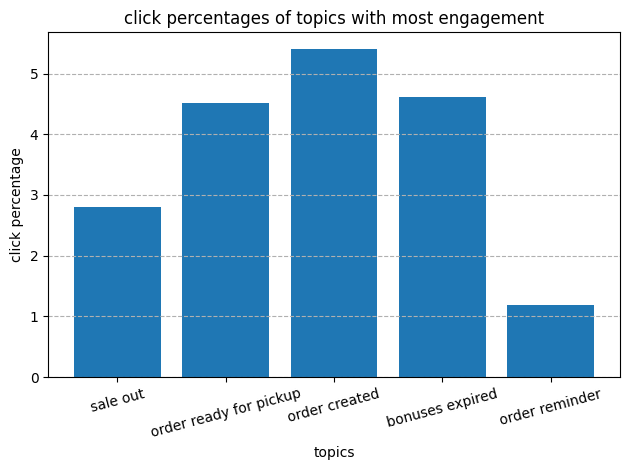

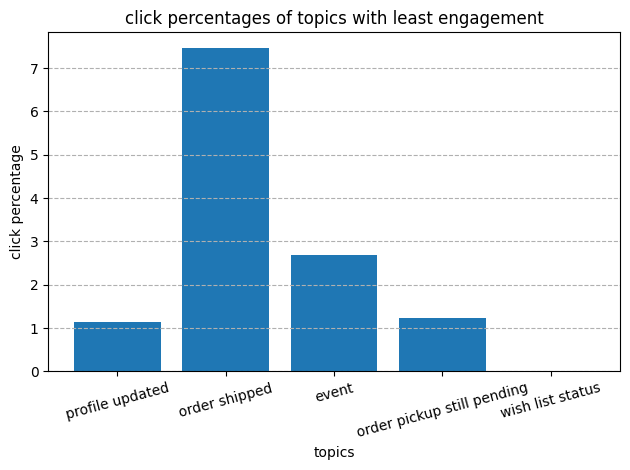

In [88]:
plt.bar(topics.index[:5].to_list(), clicks_percentages[:5])
plt.title("click percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('click percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

plt.bar(topics.index[-5:].to_list(), clicks_percentages[-5:])
plt.title("click percentages of topics with least engagement")
plt.xlabel('topics')
plt.ylabel('click percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()




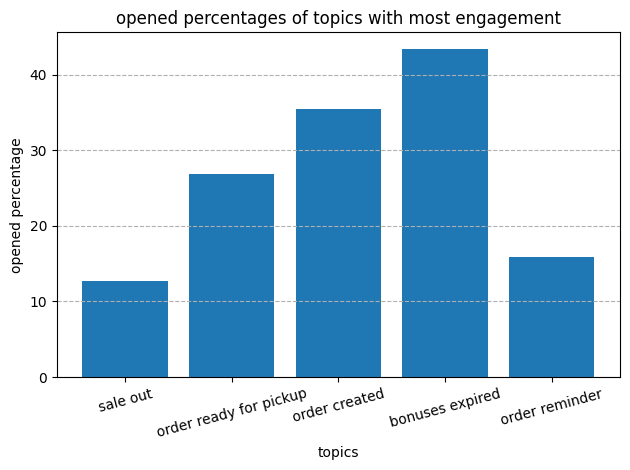

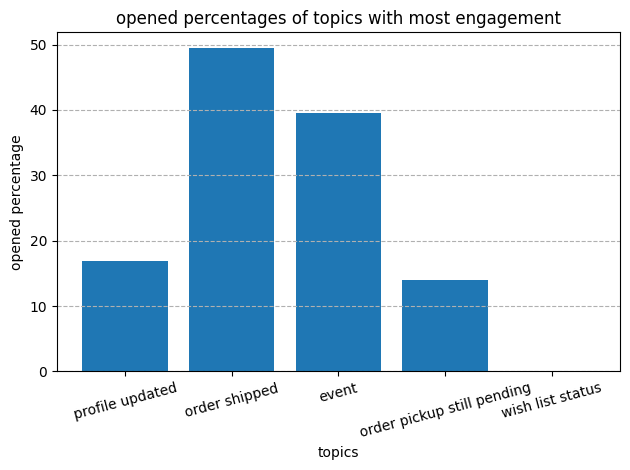

In [89]:
plt.bar(topics.index[:5].to_list(), opened_percentages[:5])
plt.title("opened percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('opened percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

plt.bar(topics.index[-5:].to_list(), opened_percentages[-5:])
plt.title("opened percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('opened percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

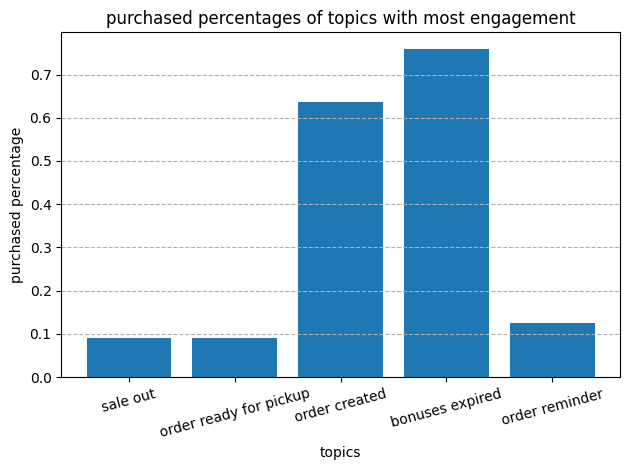

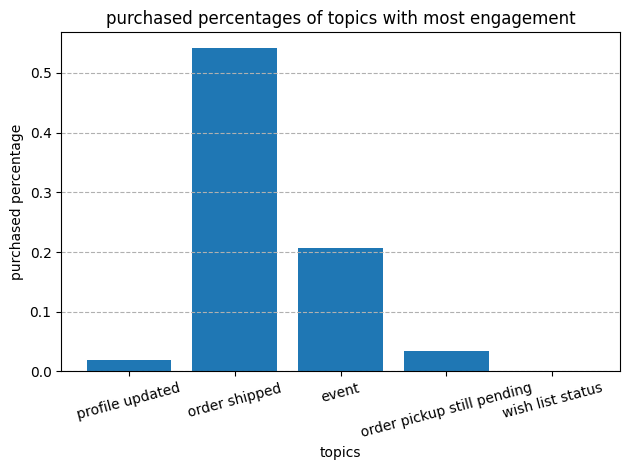

In [90]:
plt.bar(topics.index[:5].to_list(), purchased_percentages[:5])
plt.title("purchased percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('purchased percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

plt.bar(topics.index[-5:].to_list(), purchased_percentages[-5:])
plt.title("purchased percentages of topics with most engagement")
plt.xlabel('topics')
plt.ylabel('purchased percentage')
plt.xticks(rotation=15)
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

**NOTE** what can we read from the plots?? I don't understand how there is a campaign with the topic order shipped!! this one is weird. maybe we should manually select the topics we want to review.
chech the effect of holidays on sales!!
heatmap to discover important features correlated with purchases, clicks, or opens.